## MATH6373 HW2
## Cynthia Atanga
## Jasmine Eshun

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from numpy import linalg as LA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import tensorflow as tf
from mpl_toolkits.mplot3d import Axes3D
import math
import random

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [138]:
from IPython.display import HTML
HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){

$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the
raw code."></form>''')

### Original data set

In [3]:
#extract data and drop unnecessary features
airQ=pd.read_csv(r'C:\Users\cynth\.jupyter\AirQualityData.csv')
airQ=airQ.drop(['No','year','month','day','hour','station'],axis=1)
airQ.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0
1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4
2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7
3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6
4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5


### Encoded discrete numbers

In [4]:
#mapping 'wd' values to degrees of a compass
vals=airQ['wd']
x=[]
arr=["N","NNE","NE","ENE","E","ESE", "SE", "SSE","S","SSW","SW","WSW","W","WNW","NW","NNW"]
a=0
for i in range(len(arr)):
    x.append(a) 
    a+=22.5   
y=vals.unique()
x[0]=360
print(x)
for i in y:
    for j in arr:
        if i==j:
            w=(x[arr.index(j)]) 
            for z in range(len(vals)):
                if vals.loc[z]==i:
                    vals.loc[z]=w
                else: 
                    continue
vals.head()               

[360, 22.5, 45.0, 67.5, 90.0, 112.5, 135.0, 157.5, 180.0, 202.5, 225.0, 247.5, 270.0, 292.5, 315.0, 337.5]


C:\Users\cynth\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0    292.5
1    292.5
2    292.5
3      315
4    292.5
Name: wd, dtype: object

### Data set with encoded values for wind direction

In [5]:
#storing new 'wd' values in data frame
airQ = airQ.assign(wd=vals)
airQ.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,292.5,2.0
1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,292.5,4.4
2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,292.5,4.7
3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,315,2.6
4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,292.5,2.5


### Data set with the 3 selected classes from CO column

In [6]:
#select classes based on CO, duplicate the smallest class (class3) to balance the classes
#combine classes into one data frame
cl1=airQ[airQ['CO']==300]
cl2=airQ[airQ['CO']==900]
cl3=airQ[airQ['CO']==1400]
cl3=cl3.append([cl3],ignore_index=True)
print('number of cases per class after cloning:','class1:',len(cl1),', class2:',len(cl2),', class3:',len(cl3))
data=pd.concat((cl1,cl2,cl3))
print('number of cases in dataframe:',len(data))
data=data.reset_index(drop=True)
data.head(10)

number of cases per class after cloning: class1: 2341 , class2: 1820 , class3: 1842
number of cases in dataframe: 6003


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,292.5,2.5
1,8.0,8.0,6.0,13.0,300.0,61.0,-2.4,1025.4,-20.3,0.0,45,2.3
2,8.0,8.0,8.0,20.0,300.0,54.0,-0.8,1026.7,-19.9,0.0,22.5,2.0
3,3.0,6.0,9.0,23.0,300.0,50.0,0.4,1027.3,-19.4,0.0,45,2.7
4,3.0,6.0,10.0,18.0,300.0,56.0,1.5,1027.4,-19.7,0.0,67.5,2.9
5,3.0,6.0,11.0,15.0,300.0,61.0,2.1,1027.3,-21.2,0.0,22.5,4.8
6,3.0,6.0,9.0,14.0,300.0,62.0,3.1,1027.2,-21.1,0.0,360,4.1
7,3.0,6.0,8.0,10.0,300.0,67.0,4.7,1026.3,-20.6,0.0,112.5,1.6
8,3.0,9.0,7.0,9.0,300.0,70.0,5.5,1025.2,-20.0,0.0,45,3.1
9,3.0,14.0,7.0,8.0,300.0,72.0,6.6,1024.9,-19.9,0.0,315,2.1


In [7]:
#move classes column to the extreme right
data = data[['PM2.5', 'PM10', 'SO2', 'NO2', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'wd', 'WSPM', 'CO']]

In [8]:
data.head()

,PM2.5,PM10,SO2,NO2,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,CO
0,8.0,8.0,3.0,NaN,36.0,-0.9,1024.1,-21.7,0.0,292.5,2.5,300.0
1,8.0,8.0,6.0,13.0,61.0,-2.4,1025.4,-20.3,0.0,45,2.3,300.0
2,8.0,8.0,8.0,20.0,54.0,-0.8,1026.7,-19.9,0.0,22.5,2.0,300.0
3,3.0,6.0,9.0,23.0,50.0,0.4,1027.3,-19.4,0.0,45,2.7,300.0
4,3.0,6.0,10.0,18.0,56.0,1.5,1027.4,-19.7,0.0,67.5,2.9,300.0


### cleaned data set with no null values

In [9]:
#identify anf fill in measing values with column means
null = data[(data.isnull().any(axis=1))]
print(len(null))
data=round((data.fillna(data.mean())),1)
data.head(10)

139


,PM2.5,PM10,SO2,NO2,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,CO
0,8.0,8.0,3.0,40.3,36.0,-0.9,1024.1,-21.7,0.0,292.5,2.5,300.0
1,8.0,8.0,6.0,13.0,61.0,-2.4,1025.4,-20.3,0.0,45.0,2.3,300.0
2,8.0,8.0,8.0,20.0,54.0,-0.8,1026.7,-19.9,0.0,22.5,2.0,300.0
3,3.0,6.0,9.0,23.0,50.0,0.4,1027.3,-19.4,0.0,45.0,2.7,300.0
4,3.0,6.0,10.0,18.0,56.0,1.5,1027.4,-19.7,0.0,67.5,2.9,300.0
5,3.0,6.0,11.0,15.0,61.0,2.1,1027.3,-21.2,0.0,22.5,4.8,300.0
6,3.0,6.0,9.0,14.0,62.0,3.1,1027.2,-21.1,0.0,360.0,4.1,300.0
7,3.0,6.0,8.0,10.0,67.0,4.7,1026.3,-20.6,0.0,112.5,1.6,300.0
8,3.0,9.0,7.0,9.0,70.0,5.5,1025.2,-20.0,0.0,45.0,3.1,300.0
9,3.0,14.0,7.0,8.0,72.0,6.6,1024.9,-19.9,0.0,315.0,2.1,300.0


## 1) Describe your Data set and the associated classification task

The original task for this data set is to utilize Tensor Flow to classify each  case in the data set into classes. The data chosen had to have at least 5000 cases, at least 5 features per case, and 3 to 5 classes. 
The data set chosen includes hourly air pollutants data from 12 nationally controlled air-quality monitoring sites. The air-quality data are from the Beijing Municipal Environmental Monitoring Center. The meteorological data in each air-quality site are matched with the nearest weather station from the China Meteorological Administration. The time period is from March 1st, 2013 to February 28th, 2017. Missing data are denoted as ‘NA’.  Each site contains about 35000 cases and 18 features per case. Specifically, one of the sites’ data was used (Wanshouxigong). The original classes are from the CO column and contains 116 unique concentrations varying from concentration 200 ug/m^3, to concentration 8400 ug/m^3. The feature names and descriptions are as follows:

No: row number

year: year of data in this row

month: month of data in this row

day: day of data in this row

hour: hour of data in this row

PM2.5: PM2.5 concentration (ug/m^3)

PM10: PM10 concentration (ug/m^3)

SO2: SO2 concentration (ug/m^3)

NO2: NO2 concentration (ug/m^3)

CO: CO concentration (ug/m^3)

O3: O3 concentration (ug/m^3)

TEMP: temperature (degree Celsius)

PRES: pressure (hPa)

DEWP: dew point temperature (degree Celsius)

RAIN: precipitation (mm)

wd: wind direction

WSPM: wind speed (m/s)

station: name of the air-quality monitoring site

All the features are continuous except for wind direction (wd) which is discrete. The discrete feature contains 16 unique values. 
This data set is an air quality data set, and for each case, I will automatically classify each case into having a CO content of 300 ug/m^3, 900 ug/m^3, or 1400 ug/m^3. These concentrations will be used to measure the quality of air from a specific site.


My reduced data set contains 6003 cases and 12 features per case, with 3 classes. My intention is to use the CO column as the determinant for the classes. Three of the CO concentrations are used as the three classes. This means the classification algorithm will utilize features to predict the concentration of CO in the air. I am using concentrations of CO at 300 ug/m^3 (2341 cases), 900 ug/m^3 (1820 cases) and 1400 ug/m^3 (921 cases).  I am cloning my data for concentration of 1400 ug/m^3 to give me 1842 cases. This will give me a total of 6003 cases. I am deleting the columns that show the row number, dates, and the station name. This leaves me with 12 features. The features kept are; PM, PM, SO, NO3, CO, O3, TEMP, PRES, DEWP, RAIN, wd, and WSPM. 



## Select training set and test set

### shuffled data frame to avoid order by class

In [10]:
#shuffle dataframe to avoid order
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,PM2.5,PM10,SO2,NO2,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,CO
0,204.0,208.0,4.0,33.0,122.0,28.2,998.0,23.1,0.0,180.0,1.4,1400.0
1,13.0,48.0,2.0,19.0,72.0,29.8,1003.6,11.3,0.0,270.0,1.3,300.0
2,13.0,40.0,2.0,33.0,64.0,18.9,999.5,4.6,0.0,270.0,1.5,300.0
3,74.0,74.0,2.0,93.0,3.0,24.9,1005.4,23.7,0.0,337.5,0.7,1400.0
4,4.0,5.0,3.0,14.0,46.0,-2.4,1025.1,-15.5,0.0,315.0,3.2,300.0


### data with classes relabeld as 1,2 and 3.

In [11]:
data.rename(columns = {'CO':'classes'}, inplace = True) 
data['classes'][data['classes']==300]=1
data['classes'][data['classes']==900]=2
data['classes'][data['classes']==1400]=3
data.head()


,PM2.5,PM10,SO2,NO2,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,classes
0,204.0,208.0,4.0,33.0,122.0,28.2,998.0,23.1,0.0,180.0,1.4,3.0
1,13.0,48.0,2.0,19.0,72.0,29.8,1003.6,11.3,0.0,270.0,1.3,1.0
2,13.0,40.0,2.0,33.0,64.0,18.9,999.5,4.6,0.0,270.0,1.5,1.0
3,74.0,74.0,2.0,93.0,3.0,24.9,1005.4,23.7,0.0,337.5,0.7,3.0
4,4.0,5.0,3.0,14.0,46.0,-2.4,1025.1,-15.5,0.0,315.0,3.2,1.0


### output values as binary data frame

In [12]:
yyy=pd.get_dummies(data['classes'])
yyy.head()

,1.0,2.0,3.0
0,0,0,1
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0


### standardized data

In [13]:
#standardize data
sdata=pd.DataFrame(preprocessing.scale(data.drop('classes',axis=1)))
Y=data['classes']
sdata.head()

,0,1,2,3,4,5,6,7,8,9,10
0,3.163182,1.827145,-0.406258,-0.267690,0.998762,1.197049,-1.253543,1.448353,-0.079945,-0.187433,-0.521635
1,-0.837010,-0.466065,-0.562270,-0.781535,0.084141,1.347477,-0.724070,0.639705,-0.079945,0.679731,-0.590683
2,-0.837010,-0.580725,-0.562270,-0.267690,-0.062198,0.322690,-1.111720,0.180558,-0.079945,0.679731,-0.452588
3,0.440538,-0.093418,-0.562270,1.934504,-1.178036,0.886793,-0.553882,1.489471,-0.079945,1.330103,-1.004968
4,-1.025501,-1.082365,-0.484264,-0.965051,-0.391461,-1.679874,1.308727,-1.196884,-0.079945,1.113313,0.721221


In [14]:
#separate into train and test sets
x_train, x_test, y_train, y_test = train_test_split(sdata, yyy, test_size=0.2, random_state=1)
a=[sum(x) for x in zip(*y_train.values)]
b=[sum(x) for x in zip(*y_test.values)]
j=0

for i in [1,2,3]:
    print('size of class', i, 'in x_train:', a[j], 'cases')
    print('ratio of class', i, 'in x_train:', round((a[j]/sum(a)),3))
    print('size of class', i, 'in x_test:', b[j], 'cases')
    print('ratio of class', i, 'in x_test:', round((b[j]/sum(b)),3), '\n')
    j+=1
x_train.shape, x_test.shape

size of class 1 in x_train: 1883 cases
ratio of class 1 in x_train: 0.392
size of class 1 in x_test: 458 cases
ratio of class 1 in x_test: 0.381 

size of class 2 in x_train: 1455 cases
ratio of class 2 in x_train: 0.303
size of class 2 in x_test: 365 cases
ratio of class 2 in x_test: 0.304 

size of class 3 in x_train: 1464 cases
ratio of class 3 in x_train: 0.305
size of class 3 in x_test: 378 cases
ratio of class 3 in x_test: 0.315 



((4802, 11), (1201, 11))

## 2) Define the MLP architecture of an Automatic Classifier with r =3 classes

### What role does the soft max play?

The soft max function transforms the output of the MLP classifier into a set of probability values with probability properties i.e. 0<p<1 and sum(pn)=1 for each case. Softmax does this by coverting output that was once a set of logits and taking each terms exponent then normalizing it. Later the cost function can consider this group of probabilities, this will useful for class analysis.

## 3) (a) Select 2 tentative sizes h for the hidden layer

In [15]:
#get the sdata by classes
c1=sdata[Y==1]
c2=sdata[Y==2]
c3=sdata[Y==3]

## PCA for training data to get h=h95 < p

Number of components, h95: 8
eigen values from x_train: 
 [3.46658431 2.37436304 1.45008251 0.88986745 0.85696043 0.66796568
 0.44605462 0.28214275]


<IPython.core.display.Javascript object>


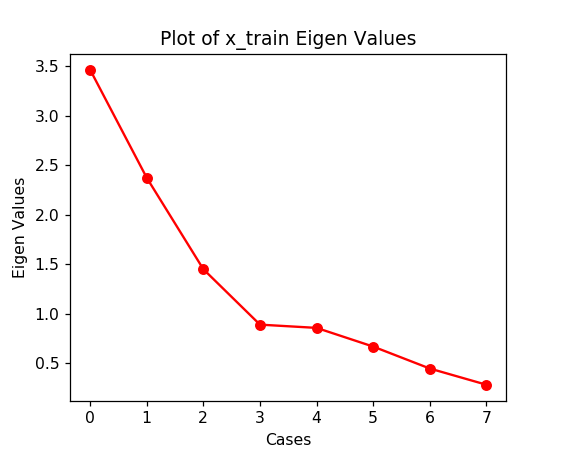

Text(0.5, 1.0, 'Plot of x_train Eigen Values')

In [16]:
pca=PCA(0.95)
pca.fit(x_train)
h95=pca.n_components_
print('Number of components, h95:',h95)
eigval_train=pca.explained_variance_ #get eigen values
print('eigen values from x_train:','\n',eigval_train)

#plot eigen values
%matplotlib notebook
plt.figure(figsize=(5, 4))
plt.figure(1)
plt.plot(eigval_train,  marker='o', label='Eigen Values', color='r')
plt.ylabel('Eigen Values')
plt.xlabel('Cases')
plt.title('Plot of x_train Eigen Values')

<IPython.core.display.Javascript object>


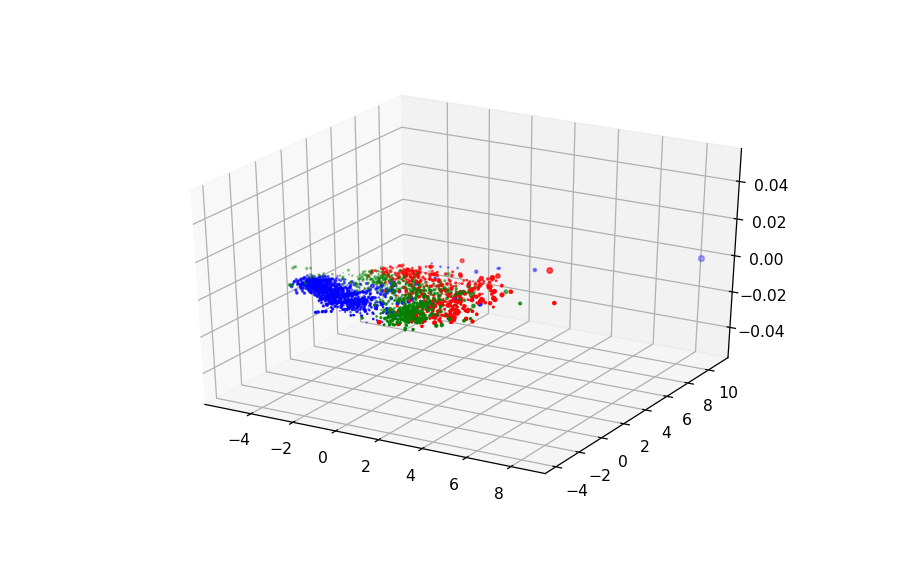

C:\Users\cynth\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


In [50]:
#3D plot of data frame with PCA
pca2 = PCA(n_components=3)
pca2.fit(x_train)
result1=pd.DataFrame(pca2.transform(c1), columns=['PCA%i' % i for i in range(3)], index=c1.index)
result2=pd.DataFrame(pca2.transform(c2), columns=['PCA%i' % i for i in range(3)], index=c2.index)
result3=pd.DataFrame(pca2.transform(c3), columns=['PCA%i' % i for i in range(3)], index=c3.index)
# Plot initialisation
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.subplot(111, projection='3d',)
plt.scatter(result3['PCA0'], result3['PCA1'], result3['PCA2'],c="r")
plt.scatter(result1['PCA0'], result1['PCA1'], result1['PCA2'],c='b')
plt.scatter(result2['PCA0'], result2['PCA1'], result2['PCA2'],c="g")


### PCA for individual classes to find hL = U1 + U2 + U3

<IPython.core.display.Javascript object>


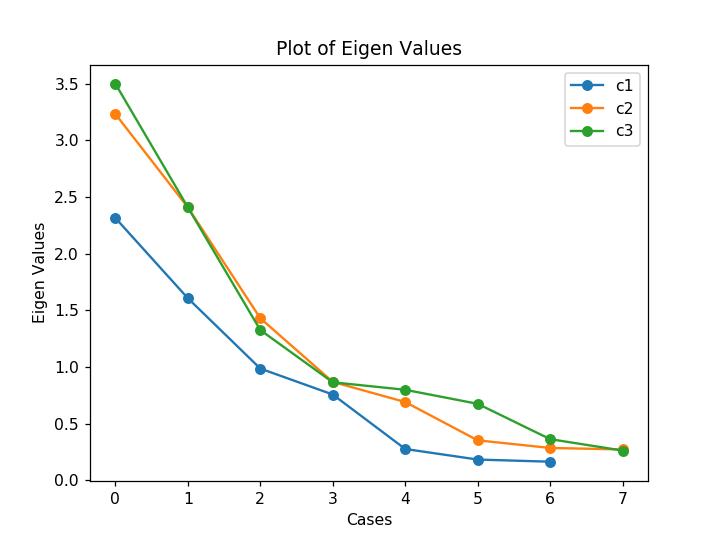

U1,U2,U3: [7, 8, 8]
hL: 23


In [18]:
c=[c1,c2,c3]
labels=['c1','c2','c3']
U=[]
cnt=0
%matplotlib notebook
plt.figure(1)
for i in c:
    pca.fit(i)
    U.append(pca.n_components_)
    eigval=pca.explained_variance_
    plt.plot(eigval, marker='o')
    plt.legend(labels)    
plt.ylabel('Eigen Values')
plt.xlabel('Cases')
plt.title('Plot of Eigen Values')
print('U1,U2,U3:',U)
hL=sum(U)
print('hL:',hL)

## 3) (b) for each one of the 2 values h= h95, h=hL implement automatic training
## 4) Performance analysis

### Defining a Neural Network function

In [98]:
def NeuralNetwork(n_hidden,batch_size,seed,add_global,training_epochs):
   
    #define parameters

    n_hidden= n_hidden #dim(H)
    n_input=len(x_train.columns) #dim(L1)
    n_classes=3 #dim(L2)
    q=3 #dim(OUT)
    D=(n_hidden*n_input + n_hidden + n_hidden*n_classes + n_classes) #(fixed) dimension D of gradient vector Gn
    d=math.sqrt(D)

    training_epochs=training_epochs
    batch_size=batch_size
    display_step=1

    """
    Global step refers to the number of batches seen by the graph. Weights are updated in the direction that minimizes the loss.
    The learning rate is a hyperparameter that controls how much to change the model in response to the estimated error 
    each time the model weights are updated
    """
    global_step=tf.Variable(0,trainable=False)  #global_step just keeps track of the number of batches seen so far by graph
    initial_learning_rate=0.01
    learning_rate=tf.train.exponential_decay(initial_learning_rate,global_step=global_step,decay_steps=training_epochs,decay_rate=0.9)
    add_global=global_step.assign_add(add_global) 
    
    """
    A placeholder for a tensor is info that will always be fed when the session is run
    Variables are values that can change
    """

    X=tf.placeholder("float",[None,n_input])
    Y=tf.placeholder("float",[None,n_classes])

    #Store layers  weight & bias
    np.random.seed(seed)
    weights={
            'h': tf.Variable(tf.random_normal([n_input,n_hidden])),
            'out':tf.Variable(tf.random_normal([n_hidden,n_classes]))
            }

    biases={
            'b':tf.Variable(tf.random_normal([n_hidden])),
            'out':tf.Variable(tf.random_normal([n_classes]))
            }

    def MLP(x):
        layer_1=tf.add(tf.matmul(x,weights['h']), biases['b'])
        layer_1=tf.nn.relu(layer_1)
        out_layer=tf.matmul(layer_1, weights['out'])+biases['out']

        return out_layer

    #construct model
    logits=MLP(X)

    #define loss and optimizer
    loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y,logits=logits))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)
    correct_prediction=tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))
    accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    confusion_matrix=tf.math.confusion_matrix(tf.argmax(logits,1),tf.argmax(Y,1))
    init=tf.global_variables_initializer()
    
    
    #Initializing the variables

    with tf.Session() as sess:
        sess.run(init)
        ini_acu=sess.run(accuracy,feed_dict={X:x_train,Y:y_train})
        train_accu1=[] #training performance
        test_accu1=[] #test performance
        train_loss=[] 
        test_loss=[]
        L_R1=[]
        LOSS1=[] 
        W_n1=[] #Vector of weights and thresholds 1
        relW=[] 
        G_n1=[] #gradient of batch 1 cross entropy for step 1
        G_ave1=[] #average gradient of batch cross entropy for step 1
        BACRE1=[] #batch average cross entropy error for batch 1
        
        #Training cycle
        for epoch in range(training_epochs):

            avg_cost=0
            total_batch=int(x_train.shape[0]/batch_size)
            store=np.append(np.reshape(sess.run(weights['h']),(1,n_hidden*n_input)),np.reshape(sess.run(weights['out']),(1,n_classes*n_hidden)))
            store=np.append(store,np.reshape(sess.run(biases['b']),(1,n_hidden)))
            store=np.append(store,np.reshape(sess.run(biases['out']),(1,n_classes)))
            for i in range(total_batch):


                step,rate=sess.run([add_global,learning_rate])
                L_R1.append(rate)
               # print(rate)
                randidx=np.random.randint(len(x_train),size=batch_size)
                batch_xs=x_train.iloc[randidx,:]
                batch_ys=y_train.iloc[randidx,:]

                sess.run(optimizer,feed_dict={X:batch_xs,Y:batch_ys})
                c = sess.run(loss,feed_dict={X:batch_xs,Y:batch_ys})
                BACRE1.append(sess.run(accuracy,feed_dict={X:batch_xs,Y:batch_ys}))
                #print(c)
                LOSS1.append(c)
                W1=np.reshape(sess.run(weights['h']),(1,n_hidden*n_input))
                W2=np.reshape(sess.run(weights['out']),(1,n_classes*n_hidden))
                W3=np.reshape(sess.run(biases['b']),(1,n_hidden))
                W4=np.reshape(sess.run(biases['out']),(1,n_classes))
                W=np.concatenate((W1,W2,W3,W4),axis=1)
                WW=LA.norm(W-store)
                relW.append(WW/(LA.norm(store)))
                W_n1.append(WW)
               # print(WW)
                G_n1.append(WW/rate)
                G_ave1.append(WW/(rate*d))
                store=W
                avg_cost+=c/total_batch
                if step%80==0:
                   train=sess.run(accuracy,feed_dict={X:x_train,Y:y_train})
                   train_accu1.append(train)
                   test=sess.run(accuracy,feed_dict={X:x_test,Y:y_test})
                   test_accu1.append(test)
                   train_loss.append(sess.run(loss,feed_dict={X:x_train,Y:y_train}))
                   test_loss.append(sess.run(loss,feed_dict={X:x_test,Y:y_test}))
        print('test confusion matrix:','\n',sess.run(confusion_matrix,feed_dict={X:x_test,Y:y_test}),'\n')
        print('train confusion matrix:','\n',sess.run(confusion_matrix,feed_dict={X:x_train,Y:y_train}))      

        return ini_acu,train_accu1,test_accu1,train_loss,test_loss,L_R1,LOSS1,W_n1,relW,G_n1,G_ave1,BACRE1


### Explain precisely what is aCRE during training and after each epoch.

Cross entropy is a performance evaluation method, this is an alternative to other popular performance methods such as MSE. CRE takes the negative of the sum of the log outputs times their target outputs for each case. The aCRE will take the average of cross enthropies for all inputs from the training set. When batch size is defined aCRE can be computed after each batch by takeing average cross entropy on the entire batch. And, when epochs are defined aCRE can be computed after a full epoch is complete and this will be repeatedly done for all batches in each epoch.

### Indicate which software environment you will use for HW2.

We are using python in the jupyter notebook environment. The library used to run this MLP is Tensor flow 1.14 Version.

###  Indicate precisely which software functions you are choosing to implement MLP learningwith aCRE loss function;

The functions we chose to implement this MLP are Tensor Flow’s RELU and SOFTMAX. We used the Optimizer function which computes gradient descent and through evaluation using loss/cross entropy. There are many customizations one can make with this package to fit the needs of their task, beginning with defining the architecture. The architecture is defined by number of layers and layer size.  

### List clearly what are the options offered for this task.

The learning rate which is defined under optimizers you can specify an optimizer that will include its own default for LR that can also be customized. 

Batch size is the number of samples your model will collect for each learning process. TF has a batch and batch_size option argument you can use to subset your data

Weights… Initialization of the weights is done with tf.variable  here you have the choice of chosing zeros, ones, randoms, normal etc. 

Tensor flow early stopping is available with keras. Early stopping can be called when defining a  callback, this asks the algorithm to stop training when performance stops improving. Early stopping contains arguments that will influence the stop decision.  

TF has many Gradient decent algorithm choices available you make this selection as you select your optimizer, options include Adadelta, Adam, SGD, etc.  

Callbacks are available with keras package it is a set of functions to be applied at given stages of the training procedure. With callbacks you get a view of internal states and additional statistics of the model during training. 

### Indicate your selections.

For the learning process, the following choice of values were chosen:

Batch size: 1000

The gradient descent algorithm used is an optimizer which uses a loss function to evaluate and carry our gradient descent.

Initialization of weights and biases: This was determined by setting an initial random seed value of 1, which produced the first randomized initial weights and biases.

Gradient descent step size: 1

epochs: 1000

Stopping the learning: The algorithm did not use this parameter to stop learning rate. However an 'if' function is definied with the neural network function which stops the learning rate at a pre-specified limit.

In [ ]:
"""
with tf.Session() as sess:
    sess.run(init)
    store=np.append(np.reshape(sess.run(weights['h']),(1,n_hidden*n_input)),np.reshape(sess.run(weights['out']),(1,n_classes*n_hidden)))
    store=np.append(store,np.reshape(sess.run(biases['b']),(1,n_hidden)))
    store=np.append(store,np.reshape(sess.run(biases['out']),(1,n_classes)))
    W1=np.reshape(sess.run(weights['h']),(1,n_hidden*n_input))
    W2=np.reshape(sess.run(weights['out']),(1,n_classes*n_hidden))
    W3=np.reshape(sess.run(biases['b']),(1,n_hidden))
    W4=np.reshape(sess.run(biases['out']),(1,n_classes))
    W=np.concatenate((W1,W2,W3,W4),axis=1)
    WW=LA.norm(W-store)

WW/LA.norm(store)
"""

In [ ]:
#NeuralNetwork(n_hidden,batch_size,initial_learning_rate,add_global,training_epochs)
#NeuralNetwork(h95,1000,0.01,1,1000)

##  Automatic training with h = h95

test confusion matrix: 
 [[435  25   2]
 [ 19 260  93]
 [  4  80 283]] 

train confusion matrix: 
 [[1807   69    6]
 [  59 1038  381]
 [  17  348 1077]]


<IPython.core.display.Javascript object>


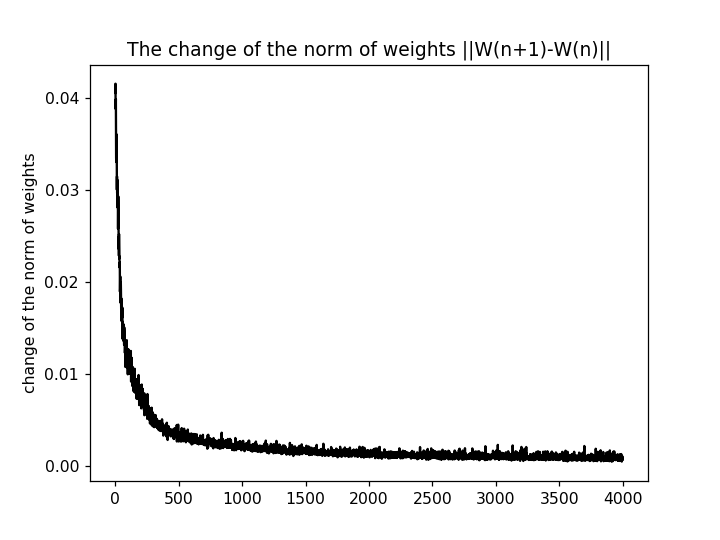

<IPython.core.display.Javascript object>


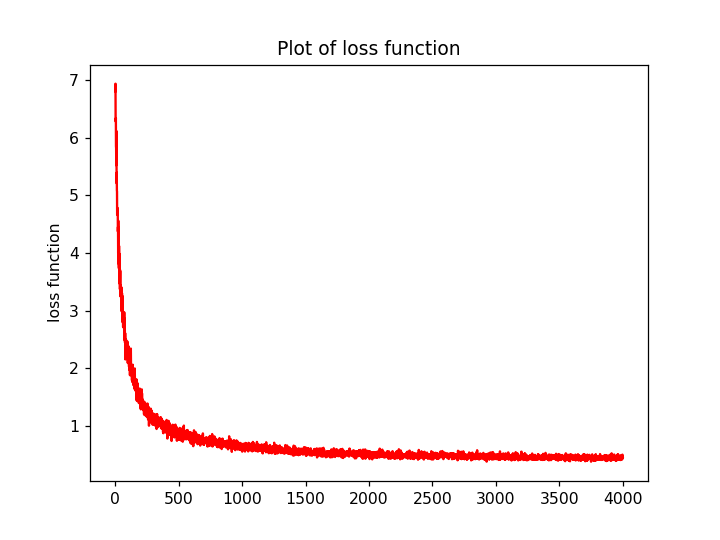

<IPython.core.display.Javascript object>


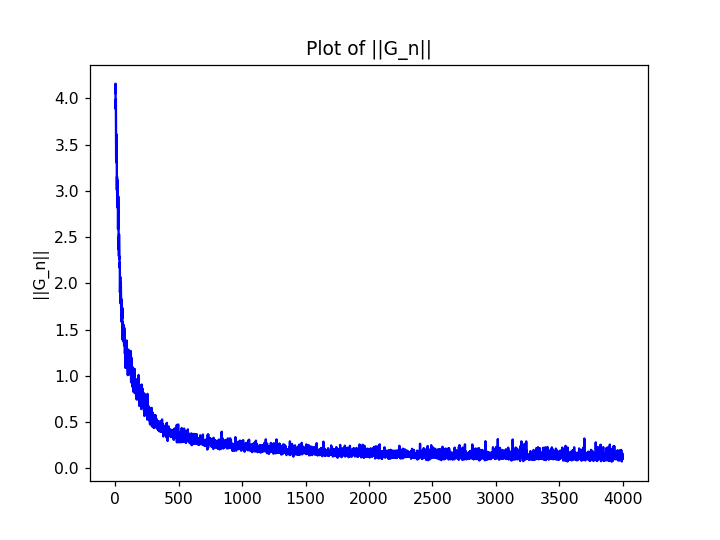

<IPython.core.display.Javascript object>


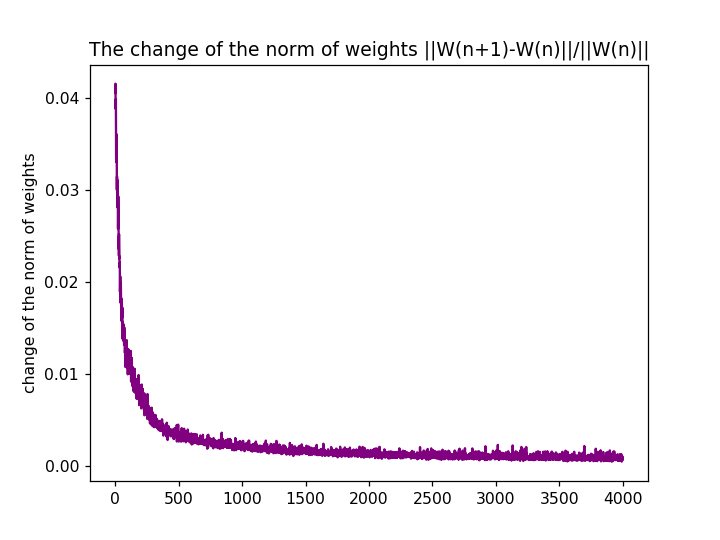

<IPython.core.display.Javascript object>


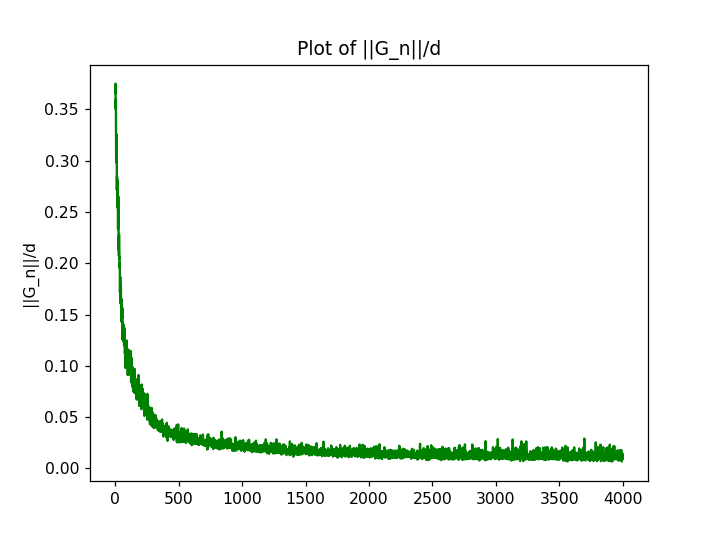

<IPython.core.display.Javascript object>


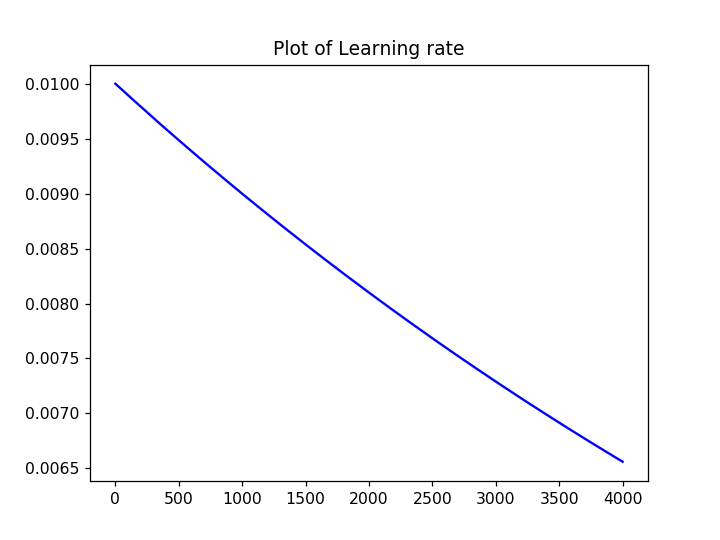

<IPython.core.display.Javascript object>


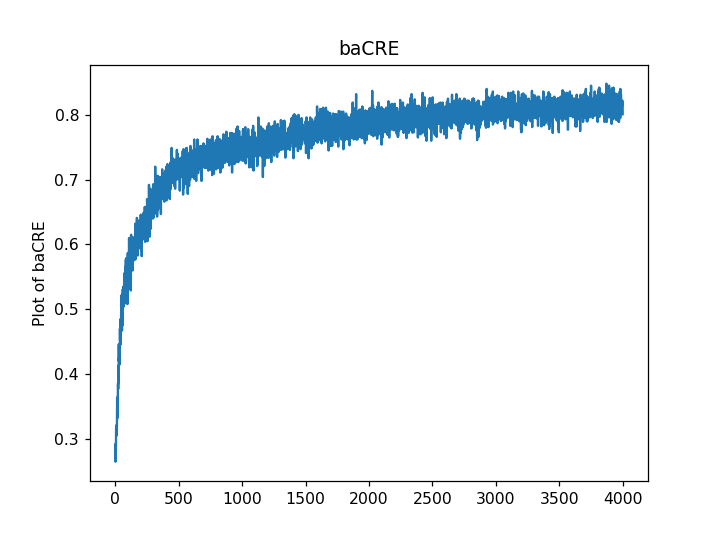

<IPython.core.display.Javascript object>


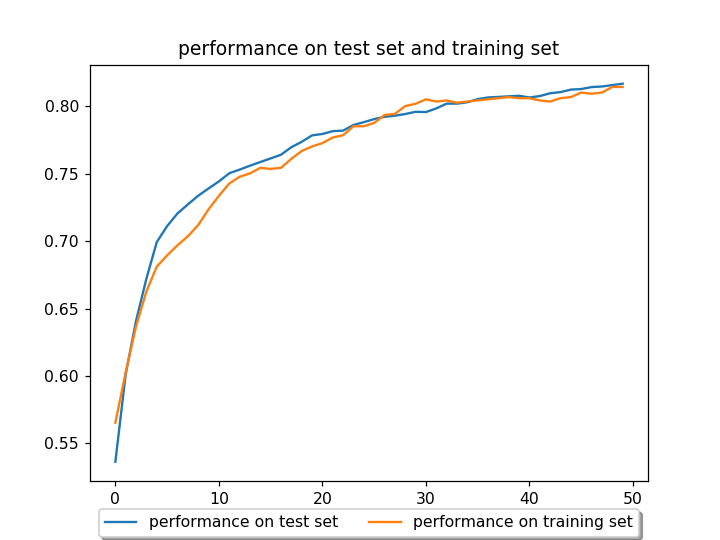

<IPython.core.display.Javascript object>


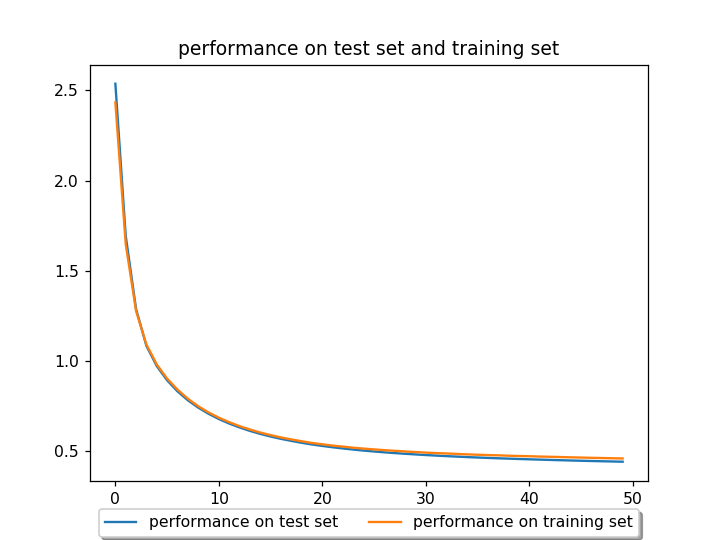

In [99]:
ini_acu,train_accu1,test_accu1,train_loss,test_loss,L_R1,LOSS1,W_n1,relW,G_n1,G_ave1,BACRE1 =NeuralNetwork(h95,1000,1,1,1000) 
%matplotlib notebook
plt.figure(1)
plt.plot(W_n1, c='black')
plt.ylabel('change of the norm of weights')
plt.title('The change of the norm of weights ||W(n+1)-W(n)||')

plt.figure(2)
plt.plot(LOSS1,c='red')
plt.ylabel('loss function')
plt.title('Plot of loss function')

plt.figure(3)
plt.plot(G_n1,c='b')
plt.ylabel('||G_n||')
plt.title('Plot of ||G_n||')

plt.figure(5)
plt.plot(W_n1,c='purple')
plt.ylabel('change of the norm of weights')
plt.title('The change of the norm of weights ||W(n+1)-W(n)||/||W(n)||')

plt.figure(4)
plt.plot(G_ave1,c='g')
plt.ylabel('||G_n||/d')
plt.title('Plot of ||G_n||/d')

plt.figure(6)
plt.plot(L_R1,c='blue')
plt.title('Plot of Learning rate')

plt.figure(7)
plt.plot(BACRE1)
plt.ylabel('Plot of baCRE')
plt.title('baCRE')

x = np.arange(50)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(x, train_accu1, label='performance on test set')
ax.plot(x, test_accu1, label='performance on training set')
plt.title('performance on test set and training set')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),shadow=True, ncol=2)
plt.show()

x = np.arange(50)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(x, train_loss, label='performance on test set')
ax.plot(x, test_loss, label='performance on training set')
plt.title('performance on test set and training set')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),shadow=True, ncol=2)
plt.show()

##  Automatic training with h = hL

test confusion matrix: 
 [[437  30   0]
 [ 18 243  98]
 [  3  92 280]] 

train confusion matrix: 
 [[1799   63    4]
 [  72 1065  362]
 [  12  327 1098]]


<IPython.core.display.Javascript object>


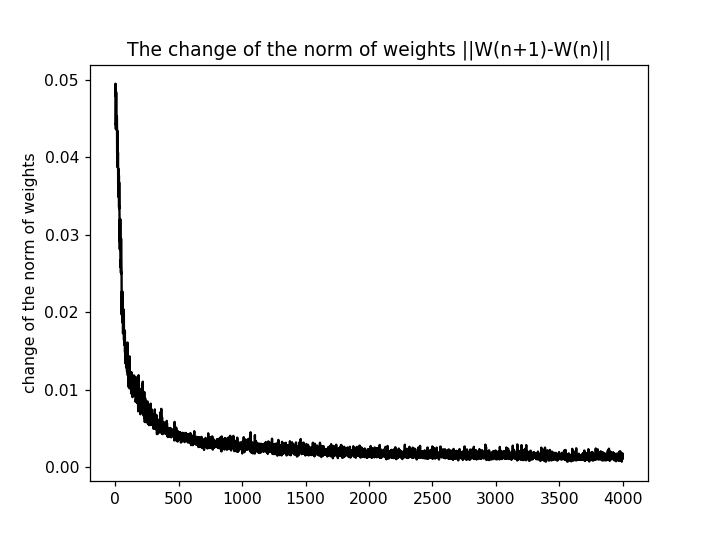

<IPython.core.display.Javascript object>


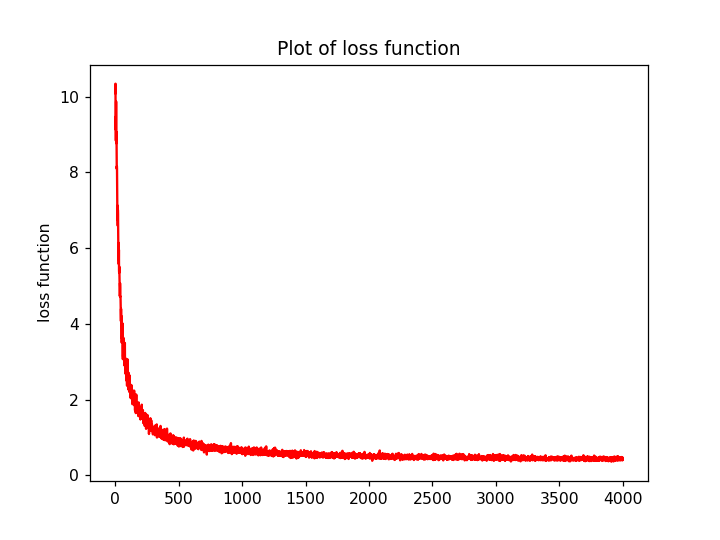

<IPython.core.display.Javascript object>


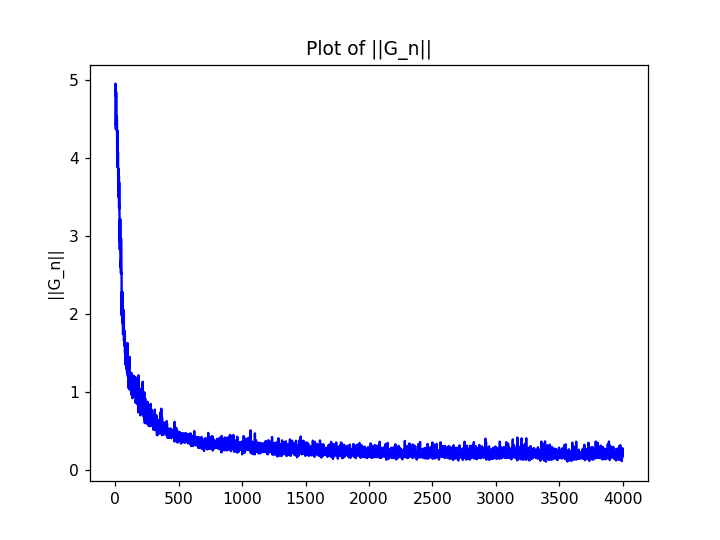

<IPython.core.display.Javascript object>


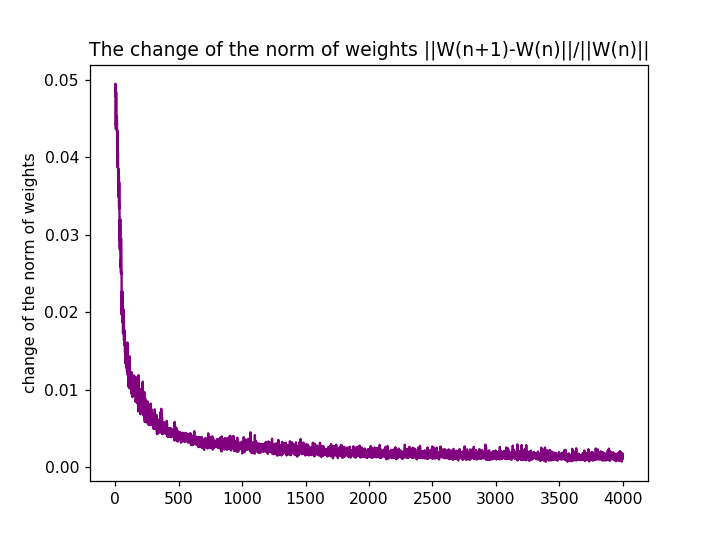

<IPython.core.display.Javascript object>


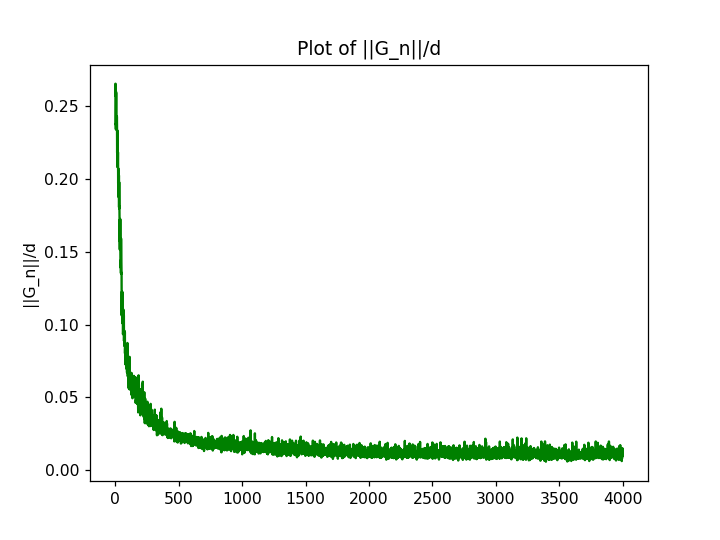

<IPython.core.display.Javascript object>


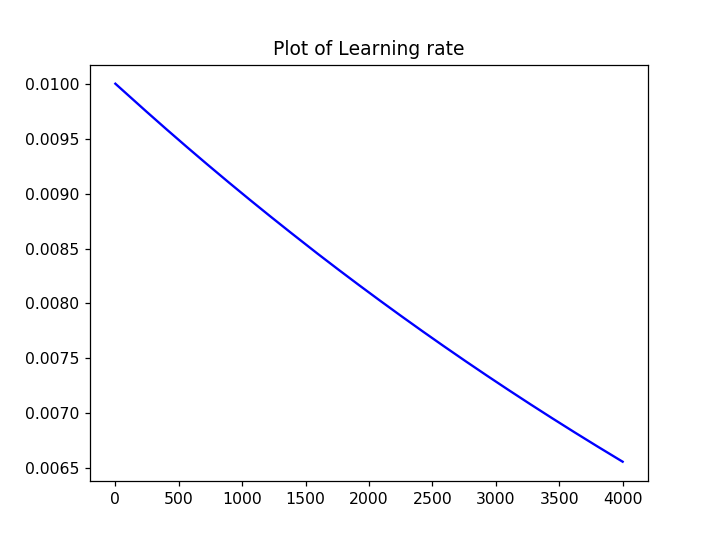

<IPython.core.display.Javascript object>


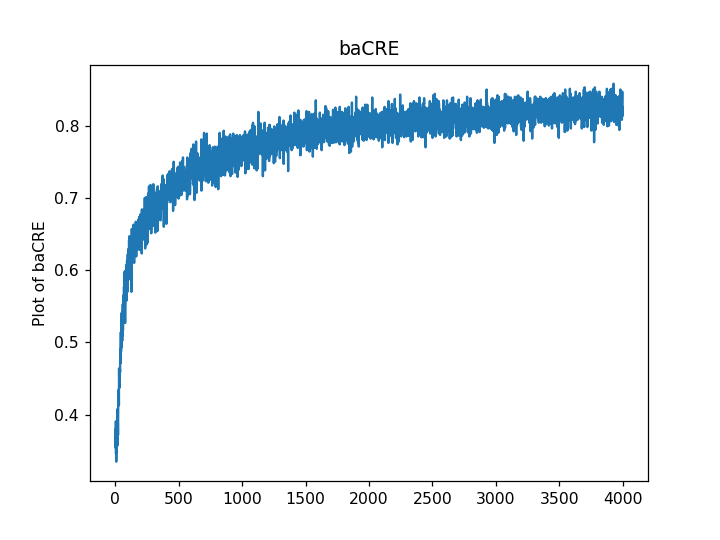

<IPython.core.display.Javascript object>


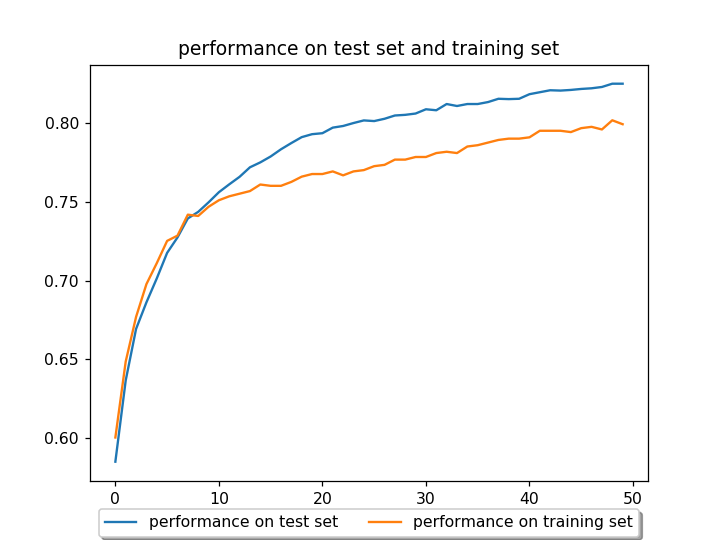

<IPython.core.display.Javascript object>


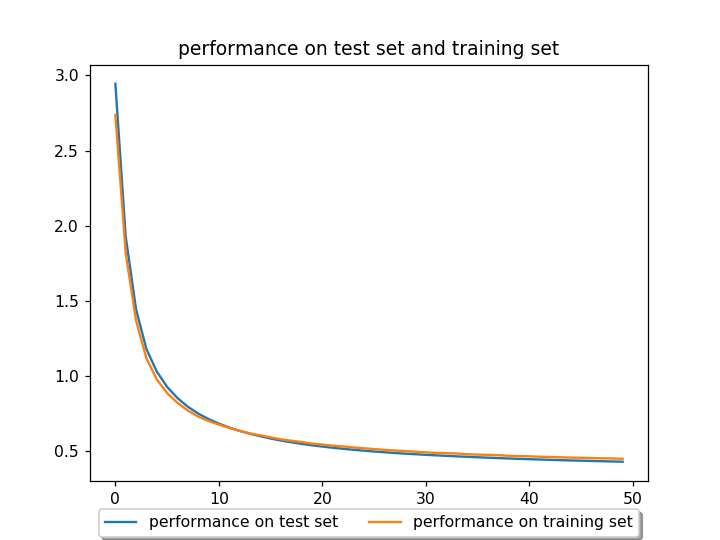

In [100]:
ini_acu,train_accu1,test_accu1,train_loss,test_loss,L_R1,LOSS1,W_n1,relW,G_n1,G_ave1,BACRE1 =NeuralNetwork(hL,1000,1,1,1000) 
%matplotlib notebook
plt.figure(1)
plt.plot(W_n1, c='black')
plt.ylabel('change of the norm of weights')
plt.title('The change of the norm of weights ||W(n+1)-W(n)||')

plt.figure(2)
plt.plot(LOSS1,c='red')
plt.ylabel('loss function')
plt.title('Plot of loss function')

plt.figure(3)
plt.plot(G_n1,c='b')
plt.ylabel('||G_n||')
plt.title('Plot of ||G_n||')

plt.figure(5)
plt.plot(W_n1,c='purple')
plt.ylabel('change of the norm of weights')
plt.title('The change of the norm of weights ||W(n+1)-W(n)||/||W(n)||')

plt.figure(4)
plt.plot(G_ave1,c='g')
plt.ylabel('||G_n||/d')
plt.title('Plot of ||G_n||/d')

plt.figure(6)
plt.plot(L_R1,c='blue')
plt.title('Plot of Learning rate')

plt.figure(7)
plt.plot(BACRE1)
plt.ylabel('Plot of baCRE')
plt.title('baCRE')

x = np.arange(50)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(x, train_accu1, label='performance on test set')
ax.plot(x, test_accu1, label='performance on training set')
plt.title('performance on test set and training set')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),shadow=True, ncol=2)
plt.show()

x = np.arange(50)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(x, train_loss, label='performance on test set')
ax.plot(x, test_loss, label='performance on training set')
plt.title('performance on test set and training set')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),shadow=True, ncol=2)
plt.show()

##  comment on the three curves, baCRE, ||W(n+1)-W(n)||/||W(n)||, and ||G_n||/d.

During the analysis you can see that the graphs all show an exponential decay with optimal points (elbow) around 250. They stay consistent between the neuron h95 and hL. This could possibly mean that change in neurons does not affect the the outputs of these curves. 

## After the last epoch Epoch(m*) compute and interpret the 3x3 confusion matrix of MLP(m*)

### h95
By the confusion matix you can tell that the MLP makes better choices for particular classes. Classification performance was better for CL1,CL3,CL2 in that order. This held true for the train and the test set. The location of the misclassifications also stayed consistent. The percentage accuracies are listed below.

#### Test Set
Class1: 94.98%

Class2: 71.23%

Class3: 74.87%

#### Train Set
Class 1: 95.96%

Class 2: 71.34%

Class 3: 73.57%

### hL
By the confusion matix you can tell that the MLP makes better choices for particular classes. Classification performance was better for CL1,CL3,CL2 in that order. This held true for the train and the test set. The location of the misclassifications also stayed consistent. What is different here than our H95 is that you can see class 2 really suffers in performance when the test set is run. The percentage accuracies are listed below.

#### Test Set
Class1: 95.41%

Class2: 66.58%

Class3: 74.10%

#### Train Set
Class 1: 95.53%

Class 2: 73.20%

Class 3: 75%

The overall performance was 81.24% on train and 78.7% on the test for hL. The overall performance for h95 was 80.29% on train and 80.36% on test. On the neuron choice H95 we can see an instance of overfitting, because the performance of the TEST surpasses the TRAIN at some points. The hL performance shows a little bit of a gap between the train and test accuracy, but is still within limits that we can say the model is doing well.

## 5) Impact of various learning options

## Effect of change in batch size 

<IPython.core.display.Javascript object>


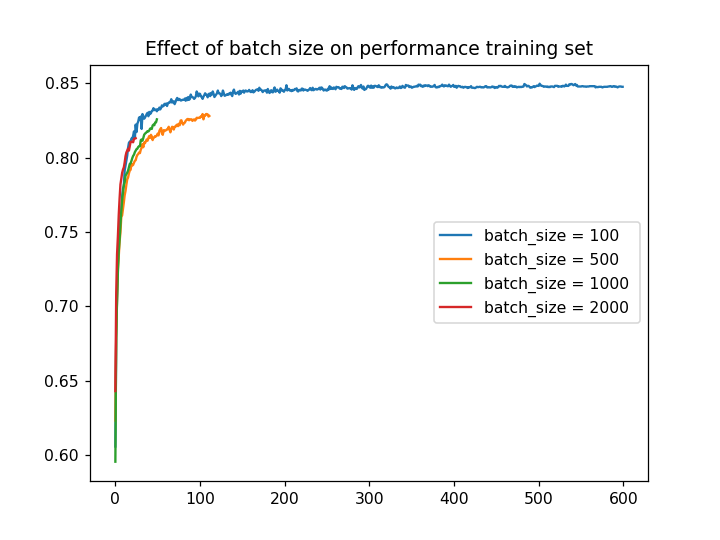

test confusion matrix: 
 [[439  16   0]
 [ 17 277  89]
 [  2  72 289]] 

train confusion matrix: 
 [[1823   30    4]
 [  53 1140  353]
 [   7  285 1107]]
test confusion matrix: 
 [[439  21   0]
 [ 16 252  93]
 [  3  92 285]] 

train confusion matrix: 
 [[1814   43    4]
 [  60 1053  355]
 [   9  359 1105]]
test confusion matrix: 
 [[433  18   0]
 [ 22 269 102]
 [  3  78 276]] 

train confusion matrix: 
 [[1809   58    6]
 [  63 1086  388]
 [  11  311 1070]]
test confusion matrix: 
 [[436  22   0]
 [ 18 252 110]
 [  4  91 268]] 

train confusion matrix: 
 [[1804   69    8]
 [  64 1034  390]
 [  15  352 1066]]


In [101]:
%matplotlib notebook
plt.figure(1)
for i in [100,500,1000,2000]:
    ini_acu,train_accu1,test_accu1,train_loss,test_loss,L_R1,LOSS1,W_n1,relW,G_n1,G_ave1,BACRE1 =NeuralNetwork(hL,i,1,1,1000) 
    plt.plot(train_accu1, label='batch_size = %s '%i)
plt.title('Effect of batch size on performance training set')
plt.legend(loc='center right')
plt.show()

### The plot shows that performance on train increases with reducing batch size. A batch size of 100 yields high performance on train than a batch size of 2000

## Effect of change in initialization of weights and biases

<IPython.core.display.Javascript object>


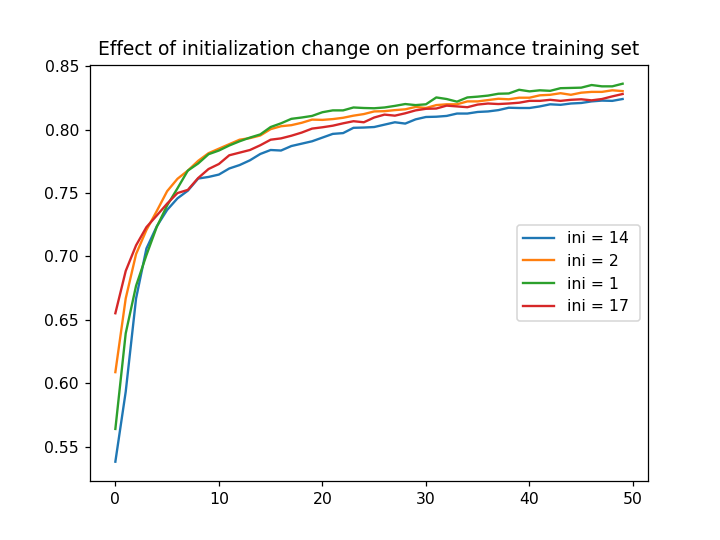

test confusion matrix: 
 [[438  23   0]
 [ 17 260 113]
 [  3  82 265]] 

train confusion matrix: 
 [[1817   67    6]
 [  56 1047  365]
 [  10  341 1093]]
test confusion matrix: 
 [[437  18   0]
 [ 18 265  91]
 [  3  82 287]] 

train confusion matrix: 
 [[1803   65    0]
 [  70 1055  335]
 [  10  335 1129]]
test confusion matrix: 
 [[437  22   2]
 [ 17 262  94]
 [  4  81 282]] 

train confusion matrix: 
 [[1816   55    2]
 [  55 1093  356]
 [  12  307 1106]]
test confusion matrix: 
 [[435  22   1]
 [ 20 258 100]
 [  3  85 277]] 

train confusion matrix: 
 [[1806   53   11]
 [  66 1095  378]
 [  11  307 1075]]


In [113]:
np.random.seed(3)
seeds=np.random.choice(20,4,replace=False)
%matplotlib notebook
plt.figure(1)
for i in seeds:
    ini_acu,train_accu1,test_accu1,train_loss,test_loss,L_R1,LOSS1,W_n1,relW,G_n1,G_ave1,BACRE1 =NeuralNetwork(hL,1000,i,1,1000) 
    plt.plot(train_accu1, label='ini = %s '%i)
plt.title('Effect of initialization change on performance training set')
plt.legend(loc='center right')
plt.show()

### From the plot, initial learning rate decreases with increasing random initialization of weights and biases. A lower seed value generates randomized weights that perform better than a higher seed value. In this case, a value of 1 performed better than a value of 17.

## Effect of change in gradient descent step size

test confusion matrix: 
 [[438  24   3]
 [ 17 265  83]
 [  3  76 292]] 

train confusion matrix: 
 [[1794   73    7]
 [  79 1062  335]
 [  10  320 1122]]


<IPython.core.display.Javascript object>


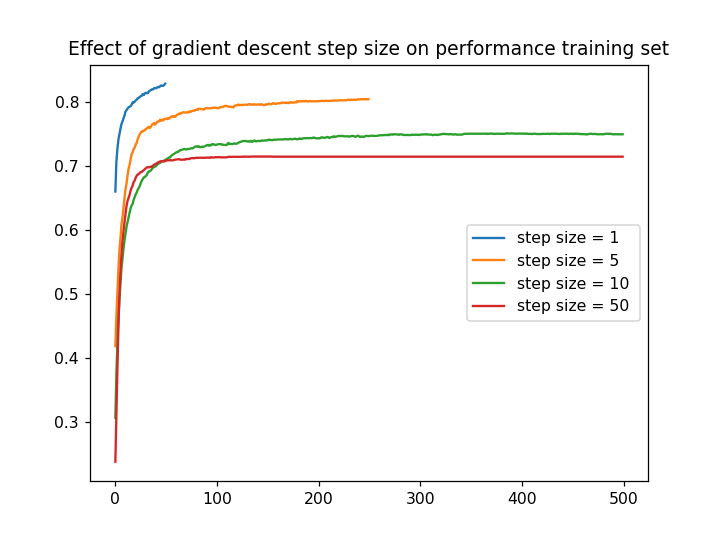

test confusion matrix: 
 [[437  27   1]
 [ 18 263  99]
 [  3  75 278]] 

train confusion matrix: 
 [[1800   70   15]
 [  70 1058  445]
 [  13  327 1004]]
test confusion matrix: 
 [[439  41   1]
 [ 16 199  95]
 [  3 125 282]] 

train confusion matrix: 
 [[1769  128    9]
 [  97  786  411]
 [  17  541 1044]]
test confusion matrix: 
 [[417  56  16]
 [ 28 198 106]
 [ 13 111 256]] 

train confusion matrix: 
 [[1688  195   40]
 [ 130  803  484]
 [  65  457  940]]


In [114]:
%matplotlib notebook
for i in [1,5,10,50]:
    ini_acu,train_accu1,test_accu1,train_loss,test_loss,L_R1,LOSS1,W_n1,relW,G_n1,G_ave1,BACRE1 =NeuralNetwork(hL,1000,1,i,1000) 
    plt.plot(train_accu1, label='step size = %s '%i)
plt.title('Effect of gradient descent step size on performance training set')
plt.legend(loc='center right')
plt.show()

### The performance on train performed worse as gradient descent step size increased. This shows that a lower step size would yield better accuracy. 

## Effect of change in epoch

<IPython.core.display.Javascript object>


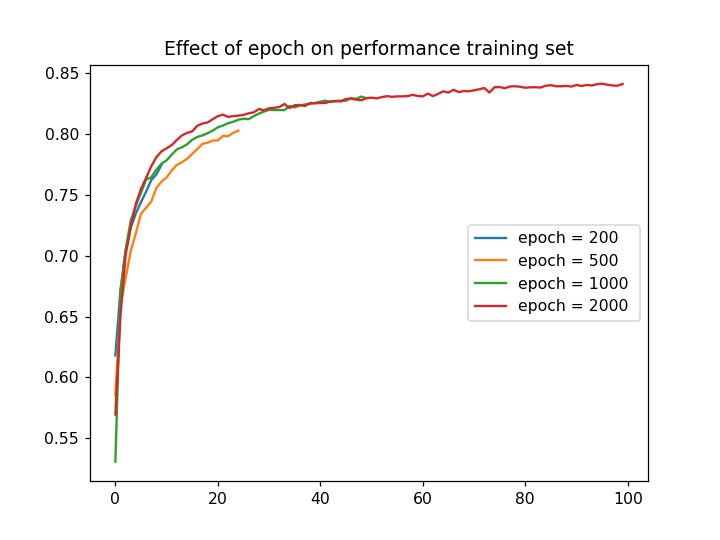

test confusion matrix: 
 [[429  32   8]
 [ 24 220  95]
 [  5 113 275]] 

train confusion matrix: 
 [[1775  116   28]
 [  96  926  417]
 [  12  413 1019]]
test confusion matrix: 
 [[434  22   1]
 [ 21 264  95]
 [  3  79 282]] 

train confusion matrix: 
 [[1797   82   17]
 [  72  996  385]
 [  14  377 1062]]
test confusion matrix: 
 [[433  24   3]
 [ 21 262  80]
 [  4  79 295]] 

train confusion matrix: 
 [[1810   59    9]
 [  63 1072  354]
 [  10  324 1101]]
test confusion matrix: 
 [[437  18   0]
 [ 18 279  92]
 [  3  68 286]] 

train confusion matrix: 
 [[1815   52    0]
 [  57 1090  330]
 [  11  313 1134]]


In [115]:
%matplotlib notebook
plt.figure(1)
for i in [200,500,1000,2000]:
    ini_acu,train_accu1,test_accu1,train_loss,test_loss,L_R1,LOSS1,W_n1,relW,G_n1,G_ave1,BACRE1 =NeuralNetwork(hL,1000,1,1,i) 
    plt.plot(train_accu1, label='epoch = %s '%i)
plt.title('Effect of epoch on performance training set')
plt.legend(loc='center right')
plt.show()

### The epochs proved to increase accuracy for larger values. An epoch of 2000 performed much better than epoch of 200.

## Effect of change in h

<IPython.core.display.Javascript object>


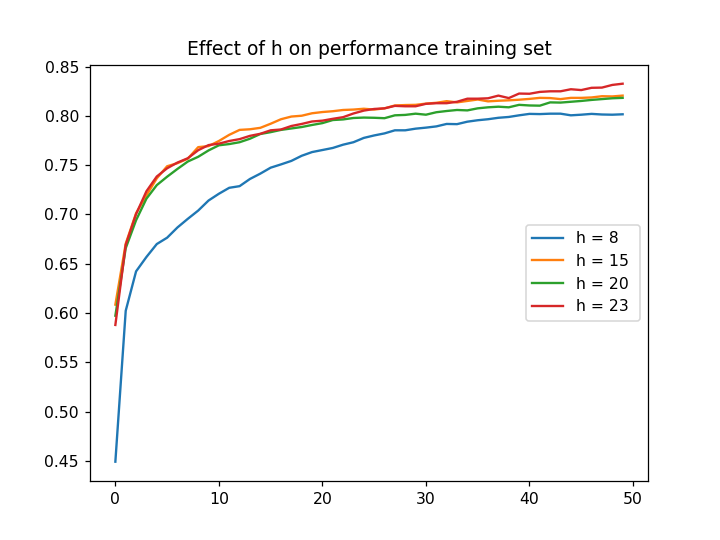

test confusion matrix: 
 [[438  34   1]
 [ 17 235  78]
 [  3  96 299]] 

train confusion matrix: 
 [[1808  133    5]
 [  62  918  336]
 [  13  404 1123]]
test confusion matrix: 
 [[438  17   0]
 [ 17 264  87]
 [  3  84 291]] 

train confusion matrix: 
 [[1811   63   10]
 [  62 1030  355]
 [  10  362 1099]]
test confusion matrix: 
 [[438  24   1]
 [ 16 266 101]
 [  4  75 276]] 

train confusion matrix: 
 [[1798   65    9]
 [  75 1047  371]
 [  10  343 1084]]
test confusion matrix: 
 [[434  23   1]
 [ 21 264  92]
 [  3  78 285]] 

train confusion matrix: 
 [[1816   43    7]
 [  55 1097  372]
 [  12  315 1085]]


In [117]:
%matplotlib notebook
plt.figure(1)
for i in [8,15,20,23]:
    ini_acu,train_accu1,test_accu1,train_loss,test_loss,L_R1,LOSS1,W_n1,relW,G_n1,G_ave1,BACRE1 =NeuralNetwork(i,1000,1,1,1000) 
    plt.plot(train_accu1, label='h = %s '%i)
plt.title('Effect of h on performance training set')
plt.legend(loc='center right')
plt.show()

As previously compared, the hidden layer with more neurons performed better than the PCA number of hidden layers. The trend is seen with more values of h computed. This shows that the model does better with the minimum value oh h=U1 + U2 + U3 derived from PCA of the individual classes. This does not necessarily guarantee that a much higher value of h will yield much better overall performance as some neurons may just be useless and there may be overfit.

## 6) Analysis of the hidden layer behaviour after completionof automatic learning

## Retreive hidden global activity vectors H(1)...H(k)...H(N)

In [118]:
n_hidden= hL #dim(H)
n_input=len(x_train.columns) #dim(L1)
n_classes=3 #dim(L2)
q=3 #dim(OUT)
D=(n_hidden*n_input + n_hidden + n_hidden*n_classes + n_classes) #(fixed) dimension D of gradient vector Gn
d=math.sqrt(D)

training_epochs=1000
batch_size=1000
display_step=1

"""
Global step refers to the number of batches seen by the graph. Weights are updated in the direction that minimizes the loss.
The learning rate is a hyperparameter that controls how much to change the model in response to the estimated error 
each time the model weights are updated
"""
global_step=tf.Variable(0,trainable=False)  #global_step just keeps track of the number of batches seen so far by graph
initial_learning_rate=0.01
learning_rate=tf.train.exponential_decay(initial_learning_rate,global_step=global_step,decay_steps=training_epochs,decay_rate=0.9)
add_global=global_step.assign_add(1) 

"""
A placeholder for a tensor is info that will always be fed when the session is run
Variables are values that can change
"""

X=tf.placeholder("float",[None,n_input])
Y=tf.placeholder("float",[None,n_classes])

#Store layers  weight & bias
np.random.seed(1)
weights={
        'h': tf.Variable(tf.random_normal([n_input,n_hidden])),
        'out':tf.Variable(tf.random_normal([n_hidden,n_classes]))
        }

biases={
        'b':tf.Variable(tf.random_normal([n_hidden])),
        'out':tf.Variable(tf.random_normal([n_classes]))
        }

def MLP(x):
    layer_1=tf.add(tf.matmul(x,weights['h']), biases['b'])
    layer_1=tf.nn.relu(layer_1)
    out_layer=tf.matmul(layer_1, weights['out'])+biases['out']

    return out_layer

#construct model
logits=MLP(X)

#define loss and optimizer
loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y,logits=logits))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)
correct_prediction=tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
confusion_matrix=tf.math.confusion_matrix(tf.argmax(logits,1),tf.argmax(Y,1))
init=tf.global_variables_initializer()


#Initializing the variables

with tf.Session() as sess:
    sess.run(init)
    ini_acu=sess.run(accuracy,feed_dict={X:x_train,Y:y_train})
    train_accu1=[] #training performance
    test_accu1=[] #test performance
    train_loss=[] 
    test_loss=[]
    L_R1=[]
    LOSS1=[] 
    W_n1=[] #Vector of weights and thresholds per step
    relW=[] 
    G_n1=[] #gradient of batch 1 cross entropy for per step
    G_ave1=[] #average gradient of batch cross entropy for per batch
    BACRE1=[] #batch average cross entropy error for per batch

    #Training cycle
    for epoch in range(training_epochs):

        avg_cost=0
        total_batch=int(x_train.shape[0]/batch_size)
        store=np.append(np.reshape(sess.run(weights['h']),(1,n_hidden*n_input)),np.reshape(sess.run(weights['out']),(1,n_classes*n_hidden)))
        store=np.append(store,np.reshape(sess.run(biases['b']),(1,n_hidden)))
        store=np.append(store,np.reshape(sess.run(biases['out']),(1,n_classes)))
        for i in range(total_batch):


            step,rate=sess.run([add_global,learning_rate])
            L_R1.append(rate)
           # print(rate)
            randidx=np.random.randint(len(x_train),size=batch_size)
            batch_xs=x_train.iloc[randidx,:]
            batch_ys=y_train.iloc[randidx,:]

            sess.run(optimizer,feed_dict={X:batch_xs,Y:batch_ys})
            c = sess.run(loss,feed_dict={X:batch_xs,Y:batch_ys})
            BACRE1.append(sess.run(accuracy,feed_dict={X:batch_xs,Y:batch_ys}))
            #print(c)
            LOSS1.append(c)
            W1=np.reshape(sess.run(weights['h']),(1,n_hidden*n_input))
            W2=np.reshape(sess.run(weights['out']),(1,n_classes*n_hidden))
            W3=np.reshape(sess.run(biases['b']),(1,n_hidden))
            W4=np.reshape(sess.run(biases['out']),(1,n_classes))
            W=np.concatenate((W1,W2,W3,W4),axis=1)
            WW=LA.norm(W-store)
            relW.append(WW/(LA.norm(store)))
            W_n1.append(WW)
           # print(WW)
            G_n1.append(WW/rate)
            G_ave1.append(WW/(rate*d))
            store=W
            avg_cost+=c/total_batch
            if step%80==0:
               train=sess.run(accuracy,feed_dict={X:x_train,Y:y_train})
               train_accu1.append(train)
               test=sess.run(accuracy,feed_dict={X:x_test,Y:y_test})
               test_accu1.append(test)
               train_loss.append(sess.run(loss,feed_dict={X:x_train,Y:y_train}))
               test_loss.append(sess.run(loss,feed_dict={X:x_test,Y:y_test}))




In [119]:
#Global states of hidden layers
hidden_global_states=[]
for i in range(len(sdata)):
    matrix=np.reshape(W1,(11,hL))
    case=np.array([sdata.iloc[i,:]])
    state=pd.DataFrame(np.matmul(case,matrix)+np.matrix(W3))
    hidden_global_states.append(state)
a=pd.concat(hidden_global_states)

In [120]:
a.head(3)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,7.480323,-0.948720,0.106063,0.014352,3.775973,8.631066,5.530220,2.368097,2.695501,3.787229,...,1.851948,0.682008,4.121148,-1.785753,3.643375,-1.770903,5.001857,-2.795016,1.830091,2.956725
0,2.767841,-0.142164,-2.618541,0.121078,-1.442301,-1.341926,-0.239466,1.084419,1.539018,2.127430,...,1.520587,3.628127,0.261469,-0.977939,4.224729,1.812043,2.249762,-1.204910,1.436034,4.391469
0,3.557050,-0.857992,-1.754747,-0.965782,-1.104341,-2.459507,-1.293619,0.728797,1.161069,2.399650,...,2.406698,2.540282,0.388973,0.356765,4.339996,2.339899,0.740128,-0.146904,0.456799,4.007123


In [121]:
#hidden layer activity vectors
neuron_states=pd.concat(hidden_global_states).reset_index(drop=True)
neuron_states

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,7.480323,-0.948720,0.106063,0.014352,3.775973,8.631066,5.530220,2.368097,2.695501,3.787229,...,1.851948,0.682008,4.121148,-1.785753,3.643375,-1.770903,5.001857,-2.795016,1.830091,2.956725
1,2.767841,-0.142164,-2.618541,0.121078,-1.442301,-1.341926,-0.239466,1.084419,1.539018,2.127430,...,1.520587,3.628127,0.261469,-0.977939,4.224729,1.812043,2.249762,-1.204910,1.436034,4.391469
2,3.557050,-0.857992,-1.754747,-0.965782,-1.104341,-2.459507,-1.293619,0.728797,1.161069,2.399650,...,2.406698,2.540282,0.388973,0.356765,4.339996,2.339899,0.740128,-0.146904,0.456799,4.007123
3,6.384928,-2.394196,-1.455858,4.563220,3.323118,2.271070,1.906807,1.075462,2.484786,0.380835,...,3.252484,-3.246183,2.232244,1.753814,1.192669,-3.931113,1.912897,-3.124341,0.279918,2.536078
4,-4.042366,6.171119,3.956273,-2.036969,-0.748802,-4.849818,1.608385,-3.462589,-1.707958,4.053003,...,0.835426,1.670175,0.779215,-0.889002,2.129641,1.493284,-6.194153,5.435014,-3.371064,0.929652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5998,-3.562496,8.154865,-0.596213,-3.449490,-0.977034,-3.604303,2.759807,-3.773765,0.620689,3.260974,...,1.955685,2.545660,0.249071,-2.318964,3.622575,1.746647,-5.131233,2.428975,-0.424669,2.730121
5999,0.668699,3.866653,0.789517,-0.628641,-1.730104,-4.699139,-2.243920,1.626566,-1.223290,2.739652,...,2.618530,3.615060,0.663984,-2.351384,3.366042,2.444575,-3.295154,2.512739,-0.014399,1.940287
6000,4.981253,-2.488482,-2.515976,-0.281045,0.272447,1.385245,-0.036157,1.191642,4.421197,2.059666,...,3.764879,-0.342590,1.599640,0.619978,4.052447,1.073321,3.116881,-1.456776,2.356472,4.025895
6001,-3.220210,4.814159,9.073286,2.198338,-0.486163,-5.782717,-2.235283,1.631344,-4.413829,3.896694,...,1.440884,0.297986,2.518187,-1.994545,-0.330522,0.705911,-7.164070,7.977921,-3.993340,-2.260398


In [122]:
#Standardize data and do correlation of data set for PCA analysis
sdata2=pd.DataFrame(preprocessing.scale(neuron_states))
sdata2_corr=sdata2.corr()
sdata2_corr.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.000000,-0.747254,-0.493903,0.446772,0.056778,0.503173,-0.520037,0.753173,0.561749,-0.547981,...,0.579221,0.024998,0.009024,0.280498,0.134820,-0.310311,0.712579,-0.437117,0.651675,0.288671
1,-0.747254,1.000000,0.286516,-0.669513,-0.397007,-0.457902,0.459363,-0.764715,-0.119236,0.195597,...,-0.136335,0.255787,0.014188,-0.164116,0.058460,0.316358,-0.798484,0.691747,-0.422072,-0.110660
2,-0.493903,0.286516,1.000000,0.194957,0.234791,-0.221884,0.357169,-0.002261,-0.588029,0.081000,...,-0.201095,-0.383043,0.656996,0.279394,-0.750563,-0.175514,-0.606874,0.524273,-0.766109,-0.678493
3,0.446772,-0.669513,0.194957,1.000000,0.483161,0.193629,-0.357322,0.625627,-0.290660,-0.144512,...,0.277215,-0.307585,0.131684,0.338332,-0.482659,-0.311896,0.430802,-0.467237,0.157400,-0.461049
4,0.056778,-0.397007,0.234791,0.483161,1.000000,0.600274,0.430283,0.149503,-0.192067,0.224452,...,-0.257847,-0.747185,0.310144,0.008976,-0.463172,-0.583960,0.299427,-0.550261,-0.094523,-0.313711


## PCA analysis

number of components: 4
eigen values: [2.18415241 1.38457684 0.60182953 0.32787038]


<IPython.core.display.Javascript object>


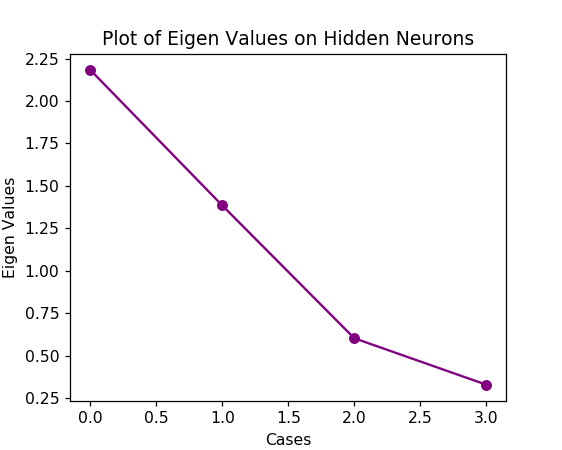

Text(0.5, 1.0, 'Plot of Eigen Values on Hidden Neurons')

In [123]:
pca3=PCA(0.95)
pca3.fit(sdata2_corr)
print('number of components:',pca3.n_components_)
print('eigen values:',pca3.explained_variance_)

eigval_sdata2=pca3.explained_variance_ #get eigen values

#plot eigen values
%matplotlib notebook
plt.figure(figsize=(5, 4))
plt.plot(eigval_sdata2,  marker='o', label='Eigen Values', color='purple')
plt.ylabel('Eigen Values')
plt.xlabel('Cases')
plt.title('Plot of Eigen Values on Hidden Neurons')

In [124]:
H_c=pd.concat((neuron_states,data['classes']),axis=1)
H_c1=H_c.drop('classes',axis=1)[H_c['classes']==1]
H_c2=H_c.drop('classes',axis=1)[H_c['classes']==2]
H_c3=H_c.drop('classes',axis=1)[H_c['classes']==3]
H_c1.shape,H_c2.shape,H_c3.shape

((2341, 23), (1820, 23), (1842, 23))

<IPython.core.display.Javascript object>


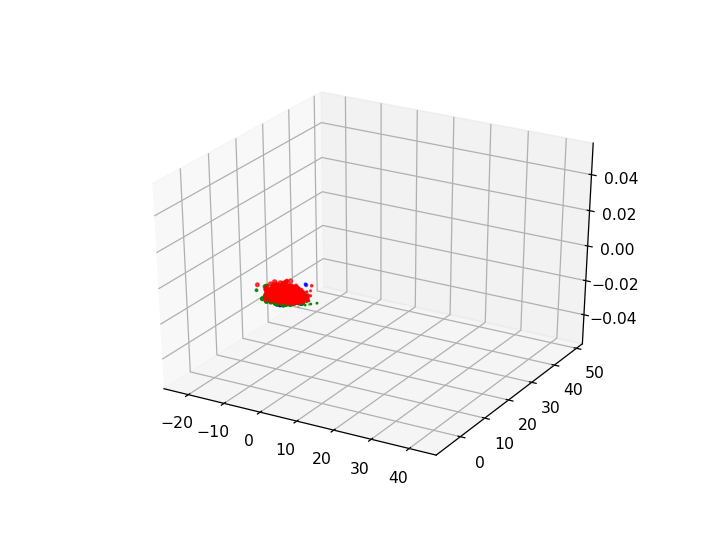

C:\Users\cynth\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


In [137]:
pca4=PCA(n_components=3)
pca4.fit(hidden_global_states)
result1=pd.DataFrame(pca4.transform(H_c1), columns=['PCA%i' % i for i in range(3)], index=H_c1.index)
result2=pd.DataFrame(pca4.transform(H_c2), columns=['PCA%i' % i for i in range(3)], index=H_c2.index)
result3=pd.DataFrame(pca4.transform(H_c3), columns=['PCA%i' % i for i in range(3)], index=H_c3.index)

# Plot initialisation
%matplotlib notebook
plt.subplot(111, projection='3d')
plt.scatter(result3['PCA0'], result3['PCA1'], result3['PCA2'],c="r")
plt.scatter(result1['PCA0'], result1['PCA1'], result1['PCA2'],c='b')
plt.scatter(result2['PCA0'], result2['PCA1'], result2['PCA2'],c="g")

## Average hidden neurons activity profiles PROF1 , PROF2, PROF3

<IPython.core.display.Javascript object>


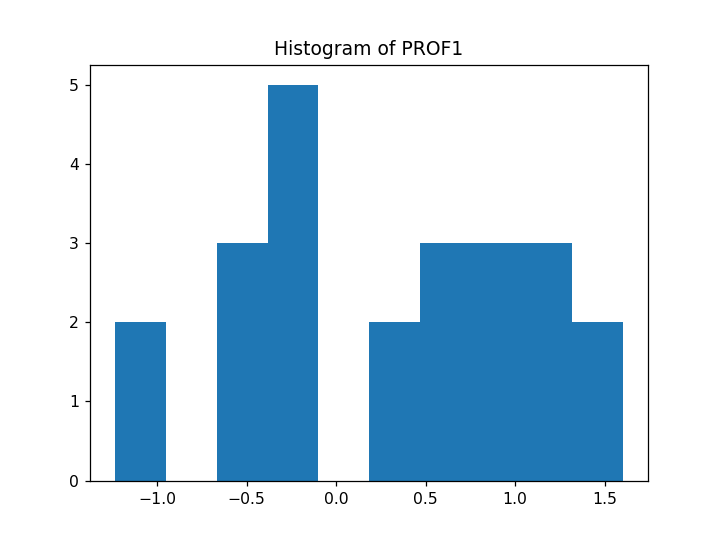

<IPython.core.display.Javascript object>


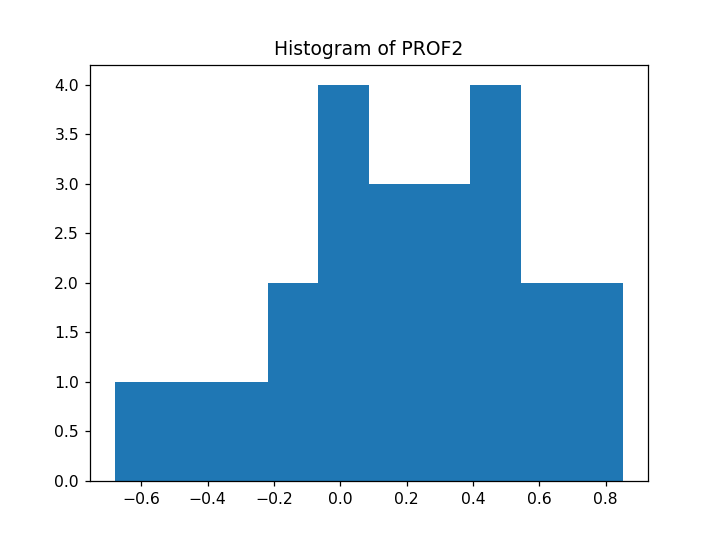

<IPython.core.display.Javascript object>


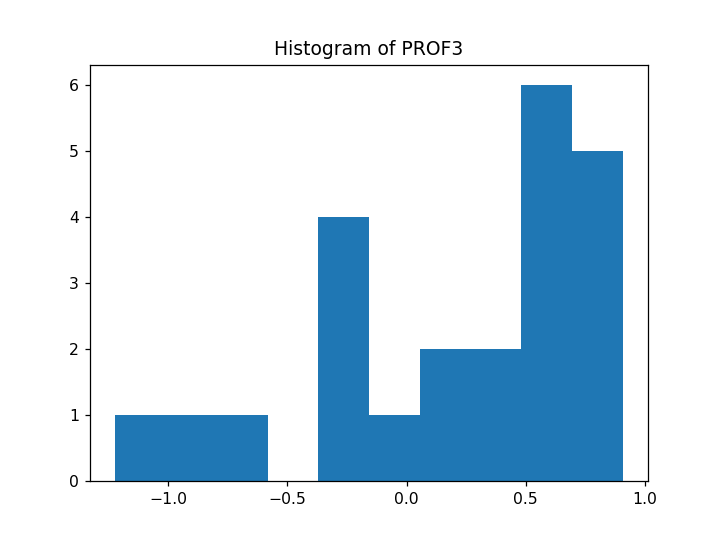

Text(0.5, 1.0, 'Histogram of PROF3')

In [128]:
avH_c1=H_c1.sum()/len(H_c)
avH_c2=H_c2.sum()/len(H_c)
avH_c3=H_c3.sum()/len(H_c)

%matplotlib notebook
plt.figure(1)
plt.hist(avH_c1)
plt.title('Histogram of PROF1')

plt.figure(2)
plt.hist(avH_c2)
plt.title('Histogram of PROF2')

plt.figure(3)
plt.hist(avH_c3)
plt.title('Histogram of PROF3')

#### The activity profiles for the hidden neurons are displayed on histograms above. 

## List hidden neurons with best DIFFERENTIATION between classes

<IPython.core.display.Javascript object>


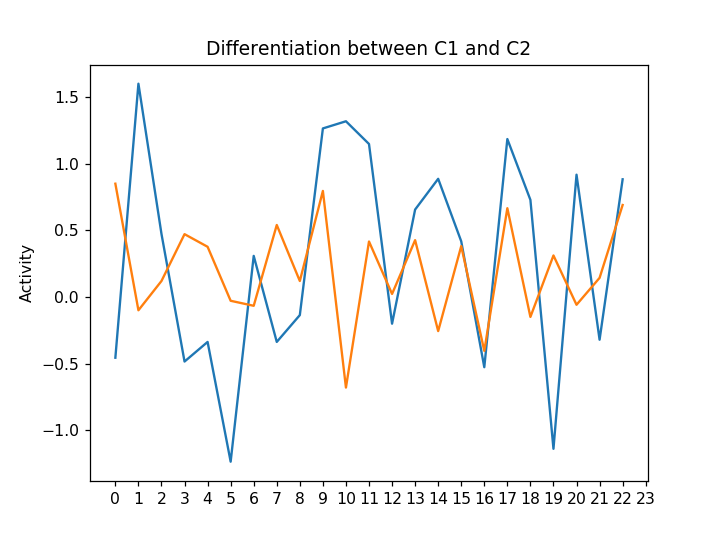

<IPython.core.display.Javascript object>


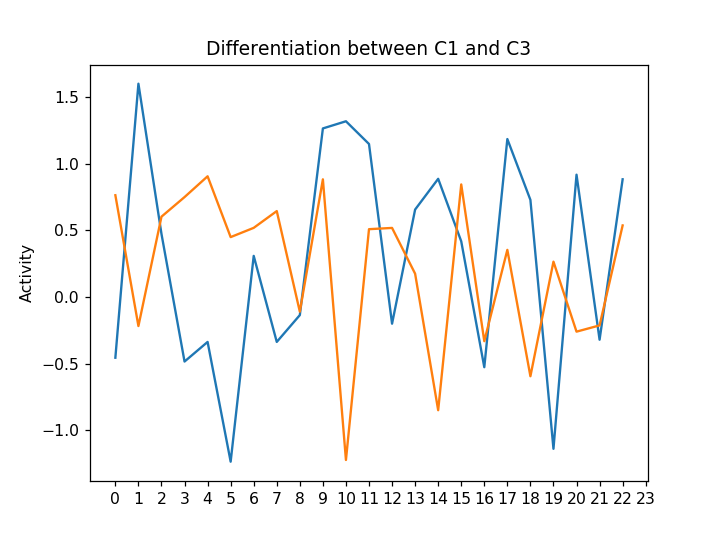

<IPython.core.display.Javascript object>


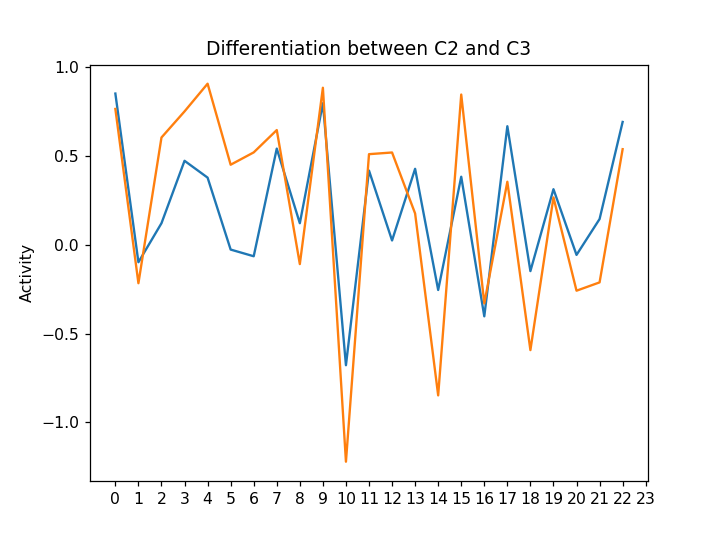

Text(0.5, 1.0, 'Differentiation between C2 and C3')

In [135]:
%matplotlib notebook
plt.figure(1)
plt.plot(avH_c1)
plt.plot(avH_c2)
plt.ylabel('Activity')
plt.xticks(np.arange(0,24,1))
plt.title('Differentiation between C1 and C2')

plt.figure(2)
plt.plot(avH_c1)
plt.plot(avH_c3)
plt.ylabel('Activity')
plt.xticks(np.arange(0,24,1))
plt.title('Differentiation between C1 and C3')

plt.figure(3)
plt.plot(avH_c2)
plt.plot(avH_c3)
plt.ylabel('Activity')
plt.xticks(np.arange(0,24,1))
plt.title('Differentiation between C2 and C3')

From the differentiation plots of the average neuron activity per classes, we can make evaluations on which neurons are most useful and which are considered 'lazy' neurons. 

For the plot between C1 and C2, the neurons that show the most differentiation are neurons {1,3,4,5,7,9,10,11,14,18,19,20}, a total of 12 neurons.

For the plot between C1 and C3, the neurons that show the most differentiation are neurons {0,1,3,4,5,7,10,11,12,14,17,18,19,20}, a total of 14 neurons.

For the plot between C2 and C3, the neurons that show the most differentiation are neurons {2,4,5,6,10,12,14,18,21}, at total of 9 neurons.

Differentiation is best between neurons in class 1 and class 3 and least between neurons in class 2 and class 3. 
